# SMS SPAM DETECTION


IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


READING CSV FILE

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')


READING ROWS

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


FINDING THE SHAPE 

In [5]:
df.shape

(5572, 5)

DROPPING THE IRRELEVANT COLUMNS

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [7]:
df.columns

Index(['v1', 'v2'], dtype='object')

RENAMING THE COLUMNS

In [8]:
df.rename(columns={'v1':'label','v2':'msg'},inplace=True)


In [9]:
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
encoder = LabelEncoder()   #conversion of categorical labels such as ham and spam to numerical format
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


CHECKING FOR NULL VALUES

In [11]:
df.isnull()


,label,msg
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [12]:
df.isnull().sum()


label    0
msg      0
dtype: int64

CALCULATING THE DUPLICATING VALUES


In [13]:
df.duplicated().sum()


403

In [14]:
df = df.drop_duplicates(keep='first')


In [15]:
df.duplicated().sum()


0

In [16]:
df.shape #shape after removing the duplicates

(5169, 2)

In [17]:
df['label'].value_counts()


0    4516
1     653
Name: label, dtype: int64

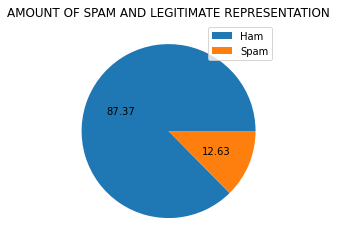

In [18]:
plt.pie(df['label'].value_counts(),autopct="%0.2f")
plt.title('AMOUNT OF SPAM AND LEGITIMATE REPRESENTATION')
plt.legend(['Ham', 'Spam'])
plt.show()


LABEL ENCODING

In [19]:
X=df['msg']
Y=df['label']


In [20]:
print(X)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: msg, Length: 5169, dtype: object


In [21]:
print(Y)


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int32


SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [23]:
X.shape


(5169,)

In [24]:
X_train.shape


(4135,)

In [25]:
Y_train.shape


(4135,)

In [26]:
X_test.shape


(1034,)

In [27]:
Y_test.shape


(1034,)

FEATURE EXTRACTION

In [28]:
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


In [29]:
print(X_train_features)


  (0, 7054)	0.36075839226747747
  (0, 6583)	0.30435292112105844
  (0, 3404)	0.6233869912877809
  (0, 1352)	0.6233869912877809
  (1, 5426)	0.7301484604418181
  (1, 2725)	0.6832885376723676
  (2, 2488)	0.4509976880080445
  (2, 1441)	0.4808473624278175
  (2, 6878)	0.44034387806428416
  (2, 1605)	0.4640368975654969
  (2, 7092)	0.3951631640306381
  (3, 4944)	1.0
  (4, 4150)	0.32645156438660716
  (4, 4369)	0.22978971322349848
  (4, 6429)	0.3382777846315093
  (4, 2179)	0.3172784353084517
  (4, 1874)	0.32645156438660716
  (4, 2312)	0.18946915146620047
  (4, 6086)	0.3172784353084517
  (4, 4990)	0.24795285907173
  (4, 1593)	0.27799865433665266
  (4, 3697)	0.31226581786242585
  (4, 5240)	0.3382777846315093
  (4, 7020)	0.17801162109347568
  (5, 6491)	0.43506510849684216
  :	:
  (4129, 5346)	0.44059536744272915
  (4129, 6626)	0.40660185401455845
  (4129, 4003)	0.37870257463202295
  (4130, 3317)	1.0
  (4131, 846)	0.6184251397568395
  (4131, 4024)	0.352267537771821
  (4131, 6460)	0.363953608168257
  

In [30]:
print(X_test_features)


  (0, 3846)	1.0
  (1, 3887)	0.7431435276355369
  (1, 3361)	0.6691320477554562
  (3, 7073)	0.5139088418198577
  (3, 5574)	0.539230915231275
  (3, 5271)	0.5139088418198577
  (3, 3033)	0.2804842078152299
  (3, 2302)	0.3199281697879221
  (4, 6932)	0.19792141887243142
  (4, 6764)	0.23916602784783556
  (4, 5444)	0.23102333749783524
  (4, 5161)	0.21041704111881845
  (4, 4948)	0.23483955606671494
  (4, 4625)	0.2572978084515192
  (4, 4423)	0.2500678660467796
  (4, 4348)	0.23483955606671494
  (4, 4300)	0.1852190947489647
  (4, 3943)	0.19095172211859315
  (4, 3159)	0.19311254995197008
  (4, 2855)	0.13838987939108957
  (4, 2005)	0.2572978084515192
  (4, 1545)	0.20515136127717104
  (4, 1525)	0.23916602784783556
  (4, 565)	0.2797560608363235
  (4, 514)	0.194249523078227
  :	:
  (1031, 6331)	0.24511587863694853
  (1031, 5345)	0.2690823291439455
  (1031, 5182)	0.2815256245617881
  (1031, 4163)	0.3258465613246129
  (1031, 3821)	0.3579978584302646
  (1031, 2649)	0.30703925816826205
  (1031, 2477)	0.3495

In [31]:
print(Y_train)


4228    0
3061    0
3345    0
3463    0
2649    0
       ..
3534    0
1124    0
2628    0
3833    0
2694    0
Name: label, Length: 4135, dtype: int32


In [32]:
print(Y_test)


2461    0
4673    0
4822    0
4174    0
5058    1
       ..
2976    0
2411    0
4691    0
5384    0
2008    0
Name: label, Length: 1034, dtype: int32


MODEL TRAINING

LOGISTIC REGRESSION

In [33]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

y_train_pred = model.predict(X_train_features)
y_test_pred = model.predict(X_test_features)

train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("\nTesting Accuracy:", test_accuracy)

Training Accuracy: 0.9620314389359129

Testing Accuracy: 0.960348162475822


NAIVE BAYES 

In [34]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_features, Y_train)

y_train_pred = nb.predict(X_train_features)
y_test_pred = nb.predict(X_test_features)

train_accuracy_nb = accuracy_score(Y_train, y_train_pred)
test_accuracy_nb = accuracy_score(Y_test, y_test_pred)

print("Training Accuracy:", train_accuracy_nb)
print("\nTesting Accuracy:", test_accuracy_nb)


Training Accuracy: 0.9787182587666263

Testing Accuracy: 0.9671179883945842


SUPPORT VECTOR MACHINE

In [35]:
from sklearn.svm import SVC

svm= SVC(kernel='linear')
svm.fit(X_train_features, Y_train)

y_train_pred = svm.predict(X_train_features)
y_test_pred= svm.predict(X_test_features)

train_accuracy_svm = accuracy_score(Y_train, y_train_pred)
test_accuracy_svm = accuracy_score(Y_test, y_test_pred)

print("Training Accuracy:", train_accuracy_svm)
print("\nTesting Accuracy:", test_accuracy_svm)


Training Accuracy: 0.9973397823458283

Testing Accuracy: 0.9806576402321083


VISUALIZATION OF VARIOUS MODELS BASED ON ACCURACY

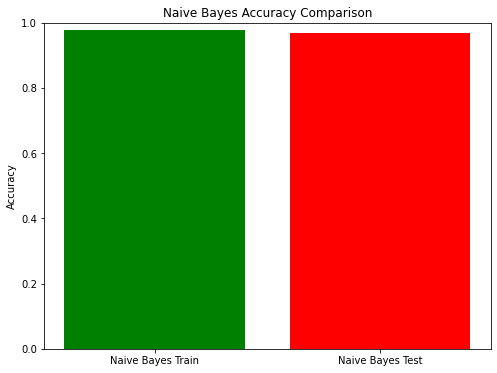

In [36]:
labels_nb = ['Naive Bayes Train', 'Naive Bayes Test']
accuracies_nb = [train_accuracy_nb, test_accuracy_nb]

plt.figure(figsize=(8, 6))
plt.bar(labels_nb, accuracies_nb, color=['green', 'red'])
plt.title('Naive Bayes Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

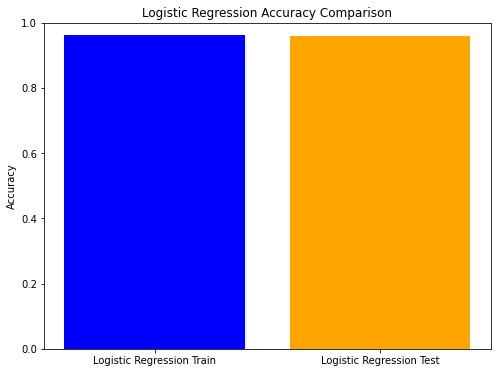

In [37]:
labels = ['Logistic Regression Train', 'Logistic Regression Test']
accuracies = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.title('Logistic Regression Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

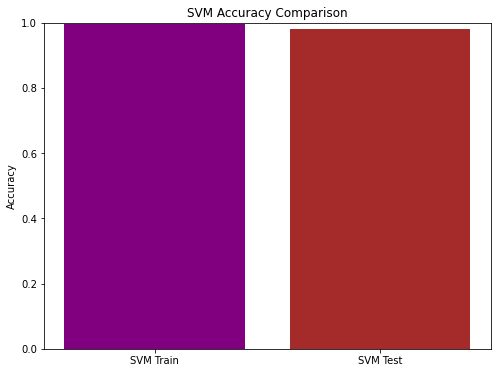

In [38]:
labels_svm = ['SVM Train', 'SVM Test']
accuracies_svm = [train_accuracy_svm, test_accuracy_svm]

plt.figure(figsize=(8, 6))
plt.bar(labels_svm, accuracies_svm, color=['purple', 'brown'])
plt.title('SVM Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

PREDICTION USING LOGISTIC REGRESSION

In [60]:
user_input_mail = input("Enter the SMS: ")
input_mail = [user_input_mail]
input_data_features = vectorizer.transform(input_mail)
prediction = model.predict(input_data_features)
if prediction[0] == 0:
    print('Legitimate')
else:
    print('Spam')



Enter the SMS: You have won a guaranteed 32000 award or maybe even å£1000 cash to claim ur award call free on 0800 ..... (18+). Its a legitimat efreefone number wat do u think???
Spam


PREDICTION USING NAIVE BAYES

In [61]:
user_input_mail = input("Enter the SMS: ")
input_mail = [user_input_mail]
input_data_features = vectorizer.transform(input_mail)
prediction = nb.predict(input_data_features)
if prediction[0] == 0:
    print('Legitimate')
else:
    print('Spam')



Enter the SMS: You have won a guaranteed 32000 award or maybe even å£1000 cash to claim ur award call free on 0800 ..... (18+). Its a legitimat efreefone number wat do u think???
Spam


PREDICTION USING SUPPORT VECTOR MACHINE

In [62]:
user_input_mail = input("Enter the SMS: ")
input_mail = [user_input_mail]
input_data_features = vectorizer.transform(input_mail)
prediction = svm.predict(input_data_features)
if prediction[0] == 0:
    print('Legitimate')
else:
    print('Spam')



Enter the SMS: You have won a guaranteed 32000 award or maybe even å£1000 cash to claim ur award call free on 0800 ..... (18+). Its a legitimat efreefone number wat do u think???
Spam
